# [Data Train] Competição ML #1 - Titanic
## CRISP-DM: Data Understanding
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Esse Jupyter Notebook contém uma **análise exploratória** dos dados. Considerando a metodologia CRISP-DM, essa atividade refere-se à segunda fase, o entendimento dos dados. 

<img src="imgs/dataUnderstanding.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

### Carregar dataset

In [3]:
dataset = pd.read_csv('datasets/train.csv')

# Eliminar o identificador dos passageiros
dataset.drop(['PassengerId'], axis=1, inplace=True)

### Entender os atributos

>#### Data Dictionary:
>**survival**: Survival (0 = No, 1 = Yes) <br>
**pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) <br>
**sex:** Sex	
**Age:** Age in years	
**sibsp**: # of siblings / spouses aboard the Titanic	
**parch:** # of parents / children aboard the Titanic	
**ticket:** Ticket number	
**fare:** Passenger fare	
**cabin:** Cabin number	
**embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

>#### Variable notes:
>**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br/>
**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br/>
**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br/>
**parch:** The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

### Verificar tipos dos atributos

In [4]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Ver forma do dataset

In [5]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  623 instâncias e  11  atributos.


### Observar amostra dos dados

In [6]:
# .sample() Mostra uma amostra aleatória
# .head() Mostra as primeiras instâncias
# .tail() Mostra as últimas instâncias
dataset.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
49,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
612,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
492,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
38,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S
386,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
268,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
303,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
588,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
468,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
18,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


### Descrever estatisticamente os dados

In [7]:
# Somente atributos numéricos são considerados
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,497.000000,623.000000,623.000000,623.000000
mean,0.394864,2.295345,29.685453,0.536116,0.398074,33.810232
std,0.489214,0.846457,14.593308,1.085521,0.826877,51.205014
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,33.760400
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Por meio da análise de quartis, já pode-se perceber a presença de outliers em algumas variáveis. A tabela descritiva também trás outras informações relevantes, como os valores máximos, mínimos e desvio padrão para cada atributo.

### Verificar presença de valores nulos

In [8]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

Survived      0
Pclass        0
Name          0
Sex           0
Age         126
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       480
Embarked      2
dtype: int64

### Separar atributos numéricos e categóricos

In [9]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.224719
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.046549
Embarked     0.321027
dtype: float64

Em relação aos valores nulos, o atributo Cabin é o que mais se destaca. Em menor quantidade, também existem nulos em Age  e Embarked.

In [10]:
# Apenas atributos int e float
numericos = (dataset.select_dtypes(include=['int64', 'float64'])).columns

# Não considerar a classe entre os atributos numéricos
#numericos = numericos.drop(['Survived'])

In [11]:
# Apenas atributos object (string)
categoricos = (dataset.select_dtypes(include=['object'])).columns

# Não considerar os atributos textuais Name, Ticket e Cabin entre os atributos categóricos 
categoricos = categoricos.drop(['Name', 'Ticket', 'Cabin'])

Inicialmente os atributos textuais (Name, Ticket e Cabin) foram descartados. Entretanto, posteriormente um trabalho de mineração textos poderia ser realizado a fim de extrair alguma informação potencialmente relevante desses atributos.

### Visualizar presença de outliers  (atributos numéricos)

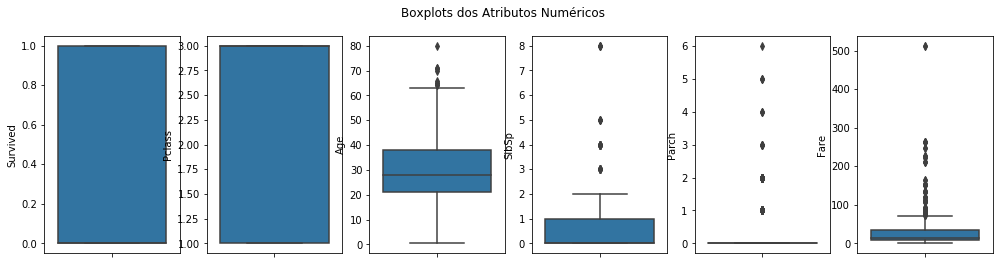

In [12]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    sns.boxplot(dataset[feature], ax=ax[i], orient='vertical')

Os boxplots acima mostra ainda mais claramente a existência de outliers para Age, SibSp, Parch e Fare, principalmente para as 3 últimas. Em etapas posteriores, pode ser que seja necessário realizar algum tratamento nas instâncias que apresentam esse tipo de comportamento.

### Visualizar distribuição dos dados (atributos numéricos)

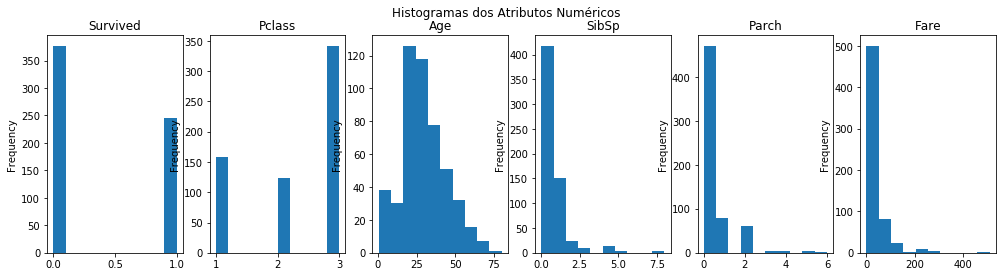

In [13]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='hist', ax=ax[i])

Analisando as distribuições, temos que:
- Existiam mais passageiros na terceira classe do que nas outras 2
- A variável Age é a que mais se aproxima de uma Distribuição Normal
- SibSp, Parch e Fare possuem, em sua maioria, valores pequenos

### Visualizar distribuição dos dados (atributos categóricos)

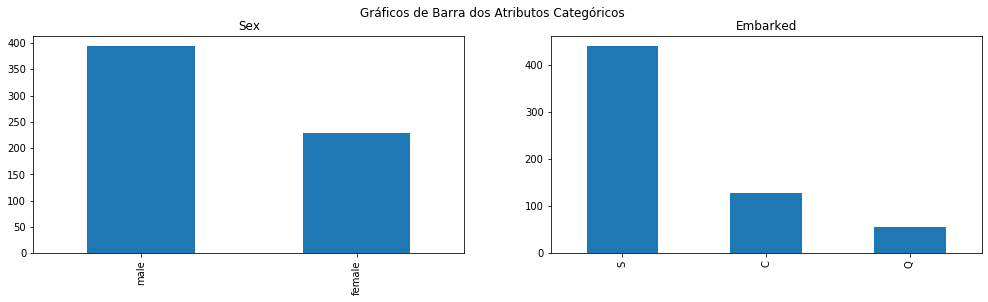

In [14]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

Existiam mais homens do que mulheres a bordo e a maioria dos passageiros embarcaram em "S" (Southampton)

### Calcular correlações

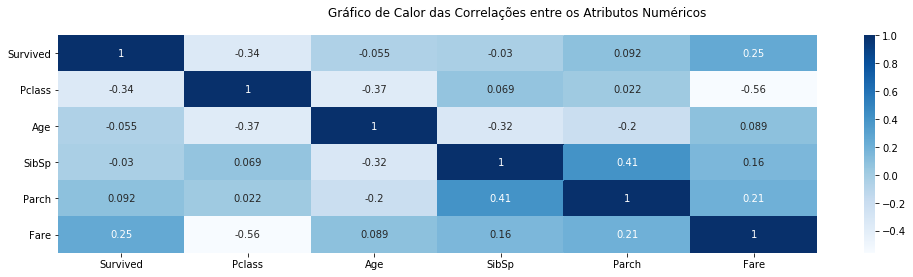

In [15]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')

O gráfico de calor mostra que as variáveis mais correlacionadas são Pclass e Fare (negativamente) e SibSp e Parch (positivamente).

### Análisar proporções

#### Homens x Mulheres

In [16]:
# Porcentagem de sobrevivência de homens
totalHomens = dataset.loc[dataset['Sex'] == 'male', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'male', 'Survived'].value_counts() / totalHomens) * 100

0    80.71066
1    19.28934
Name: Survived, dtype: float64

In [17]:
# Porcentagem de sobrevivência de mulheres
totalMulheres = dataset.loc[dataset['Sex'] == 'female', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'female', 'Survived'].value_counts() / totalMulheres) * 100

1    74.235808
0    25.764192
Name: Survived, dtype: float64

#### Crianças x adultos

In [18]:
# Porcentagem de sobrevivência de crianças (< 17 anos)
totalCriancas = dataset.loc[dataset['Age'] < 17, 'Survived'].count()
(dataset.loc[dataset['Age'] < 17, 'Survived'].value_counts() / totalCriancas) * 100

0    51.470588
1    48.529412
Name: Survived, dtype: float64

In [19]:
# Porcentagem de sobrevivência de adultos (> 17)
totalAdultos = dataset.loc[dataset['Age'] > 17, 'Survived'].count()
(dataset.loc[dataset['Age'] > 17, 'Survived'].value_counts() / totalAdultos) * 100

0    59.090909
1    40.909091
Name: Survived, dtype: float64

#### 1º Classe x 2º Classe x 3º Classe

In [20]:
# Porcentagem de sobrevivência na primeira classe
total1classe = dataset.loc[dataset['Pclass'] == 1, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 1, 'Survived'].value_counts() / total1classe) * 100

1    62.658228
0    37.341772
Name: Survived, dtype: float64

In [21]:
# Porcentagem de sobrevivência na segunda classe
total2classe = dataset.loc[dataset['Pclass'] == 2, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 2, 'Survived'].value_counts() / total2classe) * 100

1    51.219512
0    48.780488
Name: Survived, dtype: float64

In [22]:
# Porcentagem de sobrevivência na terceira classe
total3classe = dataset.loc[dataset['Pclass'] == 3, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 3, 'Survived'].value_counts() / total3classe) * 100

0    75.438596
1    24.561404
Name: Survived, dtype: float64